In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

### Data Understanding and Prepration

In [2]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [5]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [8]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [11]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [12]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [13]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])

In [14]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [15]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [17]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [18]:
#input missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [19]:
#input missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [20]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [21]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [22]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [23]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [24]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [25]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [26]:
#input missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [27]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [28]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]


Series([], dtype: int64)

In [30]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [31]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [32]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [33]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [34]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [35]:
house_data.ExterQual.value_counts()

ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [36]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [37]:
for i in house_data.columns:
    if house_data[i].dtype == object :
        print(i)
        print(house_data[i].value_counts(normalize=True))

MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: flo

In [38]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [39]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [40]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Variables

In [41]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [42]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [43]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [44]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [45]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [46]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [47]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [48]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [49]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,False,False,False,False,True,False,False,False,False,False,False,False,False,False

In [50]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PCon

In [51]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,

In [52]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [53]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,False,False,False

In [54]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkF

In [55]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fa

In [56]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,

In [57]:
house_data.shape

(1460, 162)

In [58]:
#Drop categorical variables after creating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [59]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: bool(107), float64(3), int64(39)
memory usage: 631.8 KB


### Prepairing Data For Modeling

In [60]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [61]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,448.165524,50.087169,563.745348,1061.998041,4.150833,1168.611166,343.540646,5.999021,1518.150833,0.439765,0.059745,1.567091,0.377081,2.856024,1.053869,3.511263,6.504407,0.598433,1.798237,1868.316357,1.771792,471.995103,92.641528,47.035260,23.241920,3.940255,14.047013,2.149853,48.711068,6.288932,180609.596474,36.497551
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,465.115135,170.847470,448.739203,459.098042,0.974565,397.896911,435.498994,48.207914,531.849898,0.525381,0.241230,0.551872,0.500807,0.819993,0.230169,0.659114,1.605514,0.645769,1.825859,455.160037,0.746119,212.213075,124.479090,66.195468,63.167621,32.333667,51.081766,34.524133,578.364428,2.748576,79099.444132,30.346064
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,216.000000,793.000000,3.000000,876.000000,0.000000,0.000000,1135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,129500.000000,8.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,392.000000,0.000000,462.000000,994.000000,5.000000,1086.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,161000.000000,34.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,712.000000,0.000000,806.000000,1314.000000,5.000000,1422.000000,728.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,1418.000000,857.000000,523.000000,552.000000,508.000000,374.000000,648.000000,15500.000000,12.000000,755000.000000,136.000000


### Rescalling The Numeric Factors

In [62]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,Fals

In [63]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03
mean,-1.043892e-17,-7.655211e-17,-2.696722e-16,1.539741e-16,-8.420732e-16,-6.611318e-17,1.243972e-16,1.287467e-16,6.263354e-17,8.612112e-17,-6.437336e-17,-1.870307e-17,-1.304865e-17,1.879006e-16,-3.270863e-16,0.000000,-6.350345e-17,-1.130883e-17,-5.915390e-17,4.871498e-17,-5.219462e-18,6.611318e-17,4.784507e-17,-3.479641e-18,3.862402e-16,3.070783e-16,-2.392253e-16,9.395031e-17,-2.435749e-17,2.296563e-16,7.481229e-17,-9.569013e-17,-4.523534e-17,-7.133264e-17,5.306453e-17,-2.087785e-17,-3.479641e-18,0.000000,-1.391856e-17,5.567426e-17,180609.596474,-9.742995e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490,1.000490e+00,1.000490e+00,79099.444132,1.000490e+00
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,-9.640305e-01,-2.933126e-01,-1.256903e+00,-2.314361e+00,-3.234651e+00,-2.003035,-7.892303e-01,-1.245016e-01,-2.031927e+00,-8.374505e-01,-2.477915e-01,-2.840982e+00,-7.533165e-01,-3.484694e+00,-2.341549e-01,-2.293993e+00,-2.183802e+00,-9.271528e-01,-9.853544e-01,-4.106758e+00,-2.375841e+00,-2.225247e+00,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.925187e+00,34900.000000,-1.203301e+00
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,-9.640305e-01,-2.933126e-01,-7.753184e-01,-5.862144e-01,-1.181447e+00,-0.735755,-7.892303e-01,-1.245016e-01,-7.207646e-01,-8.374505e-01,-2.477915e-01,-1.028080e+00,-7.533165e-01,-1.044452e+00,-2.341549e-01,-7.760625e-01,-9.374844e-01,-9.271528e-01,-9.853544e-01,1.971342e-01,-1.034916e+00,-6.694436e-01,-7.445984e-01,-7.108993e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-8.331783e-01,129500.000000,-9.395458e-01
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,-1.208154e-01,-2.933126e-01,-2.268472e-01,-1.481848e-01,8.717571e-01,-0.207721,-7.892303e-01,-1.245016e-01,-9.810360e-02,-8.374505e-01,-2.477915e-01,7.848212e-01,-7.533165e-01,1.756687e-01,-2.341549e-01,-7.760625e-01,-3.143258e-01,6.221483e-01,1.105572e-01,2.410963e-01,3.060094e-01,3.773952e-02,-7.445984e-01,-3.179307e-01,-3.681207e-01,-1.219220e-01,-2.751255e-01,-0.062302,-8.426338e-02,-1.051723e-01,161000.000000,-8.234265e-02
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,5.6752

### Training The Model

In [64]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [67]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 64),
 ('LotArea', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', False, 45),
 ('YearRemodAdd', False, 82),
 ('MasVnrArea', False, 46),
 ('ExterQual', False, 108),
 ('BsmtQual', False, 104),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 53),
 ('BsmtFinSF1', False, 16),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', False, 19),
 ('HeatingQC', False, 109),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', False, 11),
 ('BsmtFullBath', False, 37),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 49),
 ('HalfBath', False, 50),
 ('BedroomAbvGr', False, 98),
 ('KitchenAbvGr', False, 61),
 ('KitchenQual', False, 5),
 ('TotRmsAbvGrd', False, 84),
 ('Fireplaces', False, 74),
 ('FireplaceQu', False, 102),
 ('GarageYrBlt', False, 29),
 ('GarageCars', False, 76),
 ('GarageArea', False, 60),
 ('WoodDeckSF', False, 99),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 105),
 ('3SsnPor

In [70]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Wd Shng', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [71]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA'], dtype='object', length=113)

### Building model using statsmodel, for the detailed statistics


In [72]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [73]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe.astype(float)).fit()  #Running the linear Model

In [75]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:01   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     986   BIC:                         2.437e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.771e+05   3164.491     55.950      0.000    1.71e+05    1.83e+05
OverallQual           2.605e+04   1754.916     14.845      0.000    2.26e+04    2.95e+04
BsmtExposure          1.349e+04   1210.503     11.143      0.000    1.11e+04    1.59e+04
1stFlrSF              2.337e+04   1543.351     15.141      0.000    2.03e+04    2.64e+04
2ndFlrSF              2.905e+04   1949.246     14.903      0.000    2.52e+04    3.29e+04
MSSubClass_90        -2.419e+04   5801.994     -4.169      0.000   -3.56e+04   -1.28e+04
MSSubClass_120       -2.516e+04   4890.163     -5.145      0.000   -3.48e+04   -1.56e+04
MSSubClass_160       -2.651e+04   5811.064     -4.562      0.000   -3.79e+04   -1.51e+04
MSSubClass_180       -1.375e+04   1.51e+04     -0.910      0.363   -4.34e+04    1.59e+04
MSSubClass_190       -1.828e+04   7040.929     -2.597      0.010   -3.21e+04   -4467.387
LotShape_IR3         -2.931e+04   1.14e+04     -2.575      0.010   -5.16e+04   -6973.745
LotConfig_CulDSac     1.547e+04   4366.888      3.542      0.000    6899.686     2.4e+04
LotConfig_FR3        -2.399e+04   1.95e+04     -1.233      0.218   -6.22e+04    1.42e+04
Neighborhood_NPkVill   2.04e+04   1.41e+04      1.442      0.150   -7359.266    4.82e+04
Neighborhood_NoRidge  5.774e+04   6514.864      8.862      0.000     4.5e+04    7.05e+04
Neighborhood_NridgHt  6.191e+04   5244.054     11.806      0.000    5.16e+04    7.22e+04
Neighborhood_Somerst   3.13e+04   5036.615      6.214      0.000    2.14e+04    4.12e+04
Neighborhood_StoneBr  3.354e+04      1e+04      3.352      0.001    1.39e+04    5.32e+04
HouseStyle_1Story     2.481e+04   3782.800      6.559      0.000    1.74e+04    3.22e+04
HouseStyle_2.5Unf    -2.571e+04   1.21e+04     -2.126      0.034   -4.94e+04   -1983.133
Exterior1st_AsphShn  -1.572e+04    1.7e+04     -0.924      0.356   -4.91e+04    1.77e+04
Exterior1st_BrkComm  -3.899e+04   2.37e+04     -1.645      0.100   -8.55e+04    7520.836
Exterior1st_CemntBd   -2.98e+04   2.42e+04     -1.231      0.219   -7.73e+04    1.77e+04
Exterior1st_ImStucc  -4.188e+04   3.63e+04     -1.155      0.248   -1.13e+05    2.93e+04
Exterior1st_Stone    -3.031e+04   2.65e+04     -1.145      0.253   -8.23e+04    2.16e+04
Exterior1st_Stucco   -2.332e+04   7920.992     -2.945      0.003   -3.89e+04   -7779.939
Exterior2nd_AsphShn  -1.572e+04    1.7e+04     -0.924      0.356   -4.91e+04    1.77e+04
Exterior2nd_BrkFace     2.3e+04   8588.004      2.678      0.008    6144.492    3.99e+04
Exterior2nd_CBlock   -1.766e+04   3.36e+04     -0.526      0.599   -8.35e+04    4.82e+04
Exterior2nd_CmentBd   3.946e+04   2.42e+04      1.627      0.104   -8119.440     8.7e+04
Exterior2nd_ImStucc   2.765e+04   1.28e+04      2.160      0.031    2524.260    5.28e+04
Exterior2nd_Stone     3.875e+04   2.19e+04      1.770    

In [76]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
20,Exterior1st_AsphShn,inf
26,Exterior2nd_AsphShn,inf
29,Exterior2nd_CmentBd,18.87
22,Exterior1st_CemntBd,18.81
0,const,9.21
4,2ndFlrSF,3.49
18,HouseStyle_1Story,3.29
1,OverallQual,2.83
35,GarageFinish_Unf,2.37
3,1stFlrSF,2.19


In [77]:
#Exterior1st_AsphShn has high VIF, dropping the feature
X_train_new = X_train_rfe.drop(['Exterior1st_AsphShn'],axis=1)

In [78]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Wd Shng', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [79]:
#rebuild the model without GrLivArea
X_train_lm = sm.add_constant(X_train_new)

In [80]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:03   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     986   BIC:                         2.437e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.771e+05   3164.491     55.950      0.000    1.71e+05    1.83e+05
OverallQual           2.605e+04   1754.916     14.845      0.000    2.26e+04    2.95e+04
BsmtExposure          1.349e+04   1210.503     11.143      0.000    1.11e+04    1.59e+04
1stFlrSF              2.337e+04   1543.351     15.141      0.000    2.03e+04    2.64e+04
2ndFlrSF              2.905e+04   1949.246     14.903      0.000    2.52e+04    3.29e+04
MSSubClass_90        -2.419e+04   5801.994     -4.169      0.000   -3.56e+04   -1.28e+04
MSSubClass_120       -2.516e+04   4890.163     -5.145      0.000   -3.48e+04   -1.56e+04
MSSubClass_160       -2.651e+04   5811.064     -4.562      0.000   -3.79e+04   -1.51e+04
MSSubClass_180       -1.375e+04   1.51e+04     -0.910      0.363   -4.34e+04    1.59e+04
MSSubClass_190       -1.828e+04   7040.929     -2.597      0.010   -3.21e+04   -4467.387
LotShape_IR3         -2.931e+04   1.14e+04     -2.575      0.010   -5.16e+04   -6973.745
LotConfig_CulDSac     1.547e+04   4366.888      3.542      0.000    6899.686     2.4e+04
LotConfig_FR3        -2.399e+04   1.95e+04     -1.233      0.218   -6.22e+04    1.42e+04
Neighborhood_NPkVill   2.04e+04   1.41e+04      1.442      0.150   -7359.266    4.82e+04
Neighborhood_NoRidge  5.774e+04   6514.864      8.862      0.000     4.5e+04    7.05e+04
Neighborhood_NridgHt  6.191e+04   5244.054     11.806      0.000    5.16e+04    7.22e+04
Neighborhood_Somerst   3.13e+04   5036.615      6.214      0.000    2.14e+04    4.12e+04
Neighborhood_StoneBr  3.354e+04      1e+04      3.352      0.001    1.39e+04    5.32e+04
HouseStyle_1Story     2.481e+04   3782.800      6.559      0.000    1.74e+04    3.22e+04
HouseStyle_2.5Unf    -2.571e+04   1.21e+04     -2.126      0.034   -4.94e+04   -1983.133
Exterior1st_BrkComm  -3.899e+04   2.37e+04     -1.645      0.100   -8.55e+04    7520.836
Exterior1st_CemntBd   -2.98e+04   2.42e+04     -1.231      0.219   -7.73e+04    1.77e+04
Exterior1st_ImStucc  -4.188e+04   3.63e+04     -1.155      0.248   -1.13e+05    2.93e+04
Exterior1st_Stone    -3.031e+04   2.65e+04     -1.145      0.253   -8.23e+04    2.16e+04
Exterior1st_Stucco   -2.332e+04   7920.992     -2.945      0.003   -3.89e+04   -7779.939
Exterior2nd_AsphShn  -3.143e+04    3.4e+04     -0.924      0.356   -9.82e+04    3.53e+04
Exterior2nd_BrkFace     2.3e+04   8588.004      2.678      0.008    6144.492    3.99e+04
Exterior2nd_CBlock   -1.766e+04   3.36e+04     -0.526      0.599   -8.35e+04    4.82e+04
Exterior2nd_CmentBd   3.946e+04   2.42e+04      1.627      0.104   -8119.440     8.7e+04
Exterior2nd_ImStucc   2.765e+04   1.28e+04      2.160      0.031    2524.260    5.28e+04
Exterior2nd_Stone     3.875e+04   2.19e+04      1.770      0.077   -4200.223    8.17e+04
Exterior2nd_Wd Shng  -1.419e+04   6111.204     -2.321    

In [82]:
# Exterior2nd_CBlock has high P value
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

In [83]:
X_train_lm = sm.add_constant(X_train_new)

In [84]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [85]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:04   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     987   BIC:                         2.436e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.769e+05   3150.712     56.147      0.000    1.71e+05    1.83e+05
OverallQual           2.612e+04   1749.304     14.932      0.000    2.27e+04    2.96e+04
BsmtExposure           1.35e+04   1209.909     11.157      0.000    1.11e+04    1.59e+04
1stFlrSF              2.336e+04   1542.704     15.142      0.000    2.03e+04    2.64e+04
2ndFlrSF              2.906e+04   1948.429     14.914      0.000    2.52e+04    3.29e+04
MSSubClass_90        -2.417e+04   5799.698     -4.167      0.000   -3.55e+04   -1.28e+04
MSSubClass_120       -2.516e+04   4888.369     -5.147      0.000   -3.48e+04   -1.56e+04
MSSubClass_160        -2.65e+04   5808.884     -4.562      0.000   -3.79e+04   -1.51e+04
MSSubClass_180       -1.366e+04   1.51e+04     -0.905      0.366   -4.33e+04     1.6e+04
MSSubClass_190       -1.824e+04   7037.778     -2.591      0.010    -3.2e+04   -4426.354
LotShape_IR3         -2.929e+04   1.14e+04     -2.575      0.010   -5.16e+04   -6968.017
LotConfig_CulDSac     1.548e+04   4365.225      3.547      0.000    6915.336     2.4e+04
LotConfig_FR3        -2.396e+04   1.94e+04     -1.232      0.218   -6.21e+04    1.42e+04
Neighborhood_NPkVill  2.039e+04   1.41e+04      1.442      0.150   -7356.218    4.81e+04
Neighborhood_NoRidge  5.772e+04   6512.435      8.864      0.000    4.49e+04    7.05e+04
Neighborhood_NridgHt  6.185e+04   5241.015     11.802      0.000    5.16e+04    7.21e+04
Neighborhood_Somerst  3.127e+04   5034.451      6.211      0.000    2.14e+04    4.11e+04
Neighborhood_StoneBr  3.348e+04      1e+04      3.348      0.001    1.39e+04    5.31e+04
HouseStyle_1Story     2.489e+04   3778.685      6.586      0.000    1.75e+04    3.23e+04
HouseStyle_2.5Unf    -2.576e+04   1.21e+04     -2.131      0.033   -4.95e+04   -2040.242
Exterior1st_BrkComm  -3.895e+04   2.37e+04     -1.644      0.101   -8.54e+04    7547.173
Exterior1st_CemntBd  -2.977e+04   2.42e+04     -1.230      0.219   -7.72e+04    1.77e+04
Exterior1st_ImStucc  -4.194e+04   3.62e+04     -1.157      0.247   -1.13e+05    2.92e+04
Exterior1st_Stone    -3.028e+04   2.65e+04     -1.144      0.253   -8.22e+04    2.17e+04
Exterior1st_Stucco   -2.334e+04   7918.049     -2.947      0.003   -3.89e+04   -7799.302
Exterior2nd_AsphShn  -3.148e+04    3.4e+04     -0.926      0.355   -9.82e+04    3.52e+04
Exterior2nd_BrkFace   2.301e+04   8584.837      2.680      0.007    6160.710    3.99e+04
Exterior2nd_CmentBd   3.943e+04   2.42e+04      1.627      0.104   -8125.205     8.7e+04
Exterior2nd_ImStucc   2.764e+04   1.28e+04      2.159      0.031    2518.647    5.28e+04
Exterior2nd_Stone     3.881e+04   2.19e+04      1.774      0.076   -4124.420    8.17e+04
Exterior2nd_Wd Shng  -1.418e+04   6108.935     -2.321      0.021   -2.62e+04   -2188.066
GarageFinish_NA      -2.308e+04   5603.712     -4.119    

In [86]:
#dropping MSSubClass_180 for its high p value
X_train_new = X_train_new.drop(['MSSubClass_180'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     148.9
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:04   Log-Likelihood:                -12064.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     988   BIC:                         2.436e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.767e+05   3141.617     56.242      0.000    1.71e+05    1.83e+05
OverallQual           2.626e+04   1742.453     15.070      0.000    2.28e+04    2.97e+04
BsmtExposure          1.335e+04   1198.118     11.140      0.000     1.1e+04    1.57e+04
1stFlrSF              2.347e+04   1537.539     15.266      0.000    2.05e+04    2.65e+04
2ndFlrSF              2.924e+04   1937.732     15.091      0.000    2.54e+04     3.3e+04
MSSubClass_90        -2.405e+04   5797.722     -4.148      0.000   -3.54e+04   -1.27e+04
MSSubClass_120       -2.507e+04   4886.943     -5.130      0.000   -3.47e+04   -1.55e+04
MSSubClass_160       -2.615e+04   5795.352     -4.512      0.000   -3.75e+04   -1.48e+04
MSSubClass_190       -1.798e+04   7031.490     -2.557      0.011   -3.18e+04   -4183.876
LotShape_IR3         -2.942e+04   1.14e+04     -2.586      0.010   -5.17e+04   -7097.227
LotConfig_CulDSac     1.553e+04   4364.524      3.558      0.000    6962.917    2.41e+04
LotConfig_FR3        -2.395e+04   1.94e+04     -1.232      0.218   -6.21e+04    1.42e+04
Neighborhood_NPkVill  2.017e+04   1.41e+04      1.427      0.154   -7570.899    4.79e+04
Neighborhood_NoRidge  5.733e+04   6497.481      8.824      0.000    4.46e+04    7.01e+04
Neighborhood_NridgHt  6.165e+04   5235.553     11.775      0.000    5.14e+04    7.19e+04
Neighborhood_Somerst  3.125e+04   5033.928      6.207      0.000    2.14e+04    4.11e+04
Neighborhood_StoneBr  3.356e+04   9998.902      3.356      0.001    1.39e+04    5.32e+04
HouseStyle_1Story     2.531e+04   3748.899      6.752      0.000     1.8e+04    3.27e+04
HouseStyle_2.5Unf    -2.587e+04   1.21e+04     -2.140      0.033   -4.96e+04   -2152.303
Exterior1st_BrkComm  -3.891e+04   2.37e+04     -1.642      0.101   -8.54e+04    7582.430
Exterior1st_CemntBd  -3.075e+04   2.42e+04     -1.272      0.204   -7.82e+04    1.67e+04
Exterior1st_ImStucc   -4.21e+04   3.62e+04     -1.162      0.246   -1.13e+05     2.9e+04
Exterior1st_Stone    -3.077e+04   2.65e+04     -1.163      0.245   -8.27e+04    2.12e+04
Exterior1st_Stucco   -2.343e+04   7916.602     -2.960      0.003    -3.9e+04   -7898.609
Exterior2nd_AsphShn  -3.162e+04    3.4e+04     -0.930      0.353   -9.83e+04    3.51e+04
Exterior2nd_BrkFace   2.288e+04   8582.862      2.666      0.008    6035.609    3.97e+04
Exterior2nd_CmentBd   3.843e+04   2.42e+04      1.588      0.113   -9070.276    8.59e+04
Exterior2nd_ImStucc   2.773e+04   1.28e+04      2.167      0.030    2617.272    5.28e+04
Exterior2nd_Stone     3.888e+04   2.19e+04      1.777      0.076   -4044.277    8.18e+04
Exterior2nd_Wd Shng  -1.412e+04   6108.038     -2.311      0.021   -2.61e+04   -2132.009
GarageFinish_NA      -2.326e+04   5599.980     -4.153      0.000   -3.42e+04   -1.23e+04
GarageFinish_RFn     -1.384e+04   2979.855     -4.643    

In [87]:
#Exterior2nd_AsphShn
#dropping Exterior2nd_AsphShn Cmn for its high p value
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:04   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     989   BIC:                         2.435e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.767e+05   3141.377     56.250      0.000    1.71e+05    1.83e+05
OverallQual           2.623e+04   1742.131     15.059      0.000    2.28e+04    2.97e+04
BsmtExposure          1.339e+04   1197.261     11.182      0.000     1.1e+04    1.57e+04
1stFlrSF              2.342e+04   1536.580     15.245      0.000    2.04e+04    2.64e+04
2ndFlrSF              2.925e+04   1937.555     15.099      0.000    2.55e+04    3.31e+04
MSSubClass_90        -2.473e+04   5750.475     -4.301      0.000    -3.6e+04   -1.34e+04
MSSubClass_120       -2.507e+04   4886.609     -5.130      0.000   -3.47e+04   -1.55e+04
MSSubClass_160       -2.621e+04   5794.552     -4.523      0.000   -3.76e+04   -1.48e+04
MSSubClass_190        -1.79e+04   7030.480     -2.546      0.011   -3.17e+04   -4105.617
LotShape_IR3         -2.941e+04   1.14e+04     -2.586      0.010   -5.17e+04   -7093.999
LotConfig_CulDSac     1.551e+04   4364.197      3.555      0.000    6948.777    2.41e+04
LotConfig_FR3          -2.4e+04   1.94e+04     -1.234      0.217   -6.22e+04    1.42e+04
Neighborhood_NPkVill  2.018e+04   1.41e+04      1.428      0.154   -7552.397    4.79e+04
Neighborhood_NoRidge  5.737e+04   6496.919      8.830      0.000    4.46e+04    7.01e+04
Neighborhood_NridgHt  6.171e+04   5234.791     11.788      0.000    5.14e+04     7.2e+04
Neighborhood_Somerst  3.127e+04   5033.524      6.212      0.000    2.14e+04    4.11e+04
Neighborhood_StoneBr   3.36e+04   9998.093      3.361      0.001     1.4e+04    5.32e+04
HouseStyle_1Story     2.529e+04   3748.598      6.748      0.000    1.79e+04    3.27e+04
HouseStyle_2.5Unf    -2.586e+04   1.21e+04     -2.140      0.033   -4.96e+04   -2144.750
Exterior1st_BrkComm  -3.893e+04   2.37e+04     -1.643      0.101   -8.54e+04    7559.831
Exterior1st_CemntBd   -3.07e+04   2.42e+04     -1.271      0.204   -7.81e+04    1.67e+04
Exterior1st_ImStucc  -4.208e+04   3.62e+04     -1.161      0.246   -1.13e+05     2.9e+04
Exterior1st_Stone    -3.085e+04   2.65e+04     -1.166      0.244   -8.28e+04    2.11e+04
Exterior1st_Stucco   -2.337e+04   7915.743     -2.952      0.003   -3.89e+04   -7834.270
Exterior2nd_BrkFace   2.305e+04   8580.358      2.686      0.007    6209.327    3.99e+04
Exterior2nd_CmentBd   3.845e+04   2.42e+04      1.589      0.112   -9045.634     8.6e+04
Exterior2nd_ImStucc   2.779e+04   1.28e+04      2.172      0.030    2682.935    5.29e+04
Exterior2nd_Stone     3.936e+04   2.19e+04      1.800      0.072   -3556.002    8.23e+04
Exterior2nd_Wd Shng  -1.408e+04   6107.482     -2.305      0.021   -2.61e+04   -2094.734
GarageFinish_NA      -2.376e+04   5573.539     -4.263      0.000   -3.47e+04   -1.28e+04
GarageFinish_RFn     -1.383e+04   2979.650     -4.643      0.000   -1.97e+04   -7985.901
GarageFinish_Unf     -1.753e+04   3240.526     -5.410    

In [88]:
#Exterior1st_ImStucc
#dropping Exterior1st_ImStucc Cmn for its high p value
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:04   Log-Likelihood:                -12065.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     990   BIC:                         2.435e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.767e+05   3141.846     56.250      0.000    1.71e+05    1.83e+05
OverallQual           2.615e+04   1740.909     15.021      0.000    2.27e+04    2.96e+04
BsmtExposure          1.349e+04   1194.223     11.296      0.000    1.11e+04    1.58e+04
1stFlrSF              2.348e+04   1536.224     15.281      0.000    2.05e+04    2.65e+04
2ndFlrSF              2.941e+04   1932.982     15.217      0.000    2.56e+04    3.32e+04
MSSubClass_90        -2.474e+04   5751.487     -4.301      0.000    -3.6e+04   -1.35e+04
MSSubClass_120       -2.487e+04   4884.539     -5.092      0.000   -3.45e+04   -1.53e+04
MSSubClass_160       -2.607e+04   5794.388     -4.500      0.000   -3.74e+04   -1.47e+04
MSSubClass_190       -1.806e+04   7030.352     -2.569      0.010   -3.19e+04   -4266.878
LotShape_IR3         -2.958e+04   1.14e+04     -2.601      0.009   -5.19e+04   -7258.527
LotConfig_CulDSac     1.556e+04   4364.761      3.565      0.000    6996.790    2.41e+04
LotConfig_FR3        -2.413e+04   1.94e+04     -1.241      0.215   -6.23e+04     1.4e+04
Neighborhood_NPkVill  2.011e+04   1.41e+04      1.423      0.155   -7628.201    4.79e+04
Neighborhood_NoRidge  5.626e+04   6427.468      8.753      0.000    4.36e+04    6.89e+04
Neighborhood_NridgHt  6.169e+04   5235.695     11.783      0.000    5.14e+04     7.2e+04
Neighborhood_Somerst  3.127e+04   5034.411      6.211      0.000    2.14e+04    4.12e+04
Neighborhood_StoneBr  3.352e+04   9999.585      3.352      0.001    1.39e+04    5.31e+04
HouseStyle_1Story     2.534e+04   3749.081      6.758      0.000     1.8e+04    3.27e+04
HouseStyle_2.5Unf    -2.598e+04   1.21e+04     -2.149      0.032   -4.97e+04   -2259.208
Exterior1st_BrkComm  -3.894e+04   2.37e+04     -1.644      0.101   -8.54e+04    7551.912
Exterior1st_CemntBd  -3.075e+04   2.42e+04     -1.272      0.204   -7.82e+04    1.67e+04
Exterior1st_Stone    -3.094e+04   2.65e+04     -1.169      0.243   -8.29e+04     2.1e+04
Exterior1st_Stucco   -2.347e+04   7916.666     -2.964      0.003    -3.9e+04   -7932.839
Exterior2nd_BrkFace   2.313e+04   8581.564      2.695      0.007    6291.094       4e+04
Exterior2nd_CmentBd   3.841e+04   2.42e+04      1.587      0.113   -9096.735    8.59e+04
Exterior2nd_ImStucc   2.266e+04    1.2e+04      1.887      0.059    -908.484    4.62e+04
Exterior2nd_Stone     3.941e+04   2.19e+04      1.802      0.072   -3507.284    8.23e+04
Exterior2nd_Wd Shng  -1.411e+04   6108.490     -2.310      0.021   -2.61e+04   -2126.103
GarageFinish_NA      -2.379e+04   5574.457     -4.267      0.000   -3.47e+04   -1.28e+04
GarageFinish_RFn     -1.393e+04   2979.115     -4.674      0.000   -1.98e+04   -8079.271
GarageFinish_Unf     -1.751e+04   3241.047     -5.403      0.000   -2.39e+04   -1.12e+04
=========================================================

In [89]:
#Exterior1st_Stone has high P Value
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:04   Log-Likelihood:                -12066.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     991   BIC:                         2.434e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.764e+05   3131.972     56.332      0.000     1.7e+05    1.83e+05
OverallQual           2.616e+04   1741.214     15.023      0.000    2.27e+04    2.96e+04
BsmtExposure          1.352e+04   1194.233     11.318      0.000    1.12e+04    1.59e+04
1stFlrSF              2.319e+04   1517.238     15.286      0.000    2.02e+04    2.62e+04
2ndFlrSF              2.943e+04   1933.263     15.226      0.000    2.56e+04    3.32e+04
MSSubClass_90        -2.399e+04   5716.447     -4.196      0.000   -3.52e+04   -1.28e+04
MSSubClass_120       -2.483e+04   4885.312     -5.083      0.000   -3.44e+04   -1.52e+04
MSSubClass_160       -2.633e+04   5791.356     -4.546      0.000   -3.77e+04    -1.5e+04
MSSubClass_190       -1.791e+04   7030.488     -2.548      0.011   -3.17e+04   -4116.892
LotShape_IR3         -2.927e+04   1.14e+04     -2.574      0.010   -5.16e+04   -6953.050
LotConfig_CulDSac      1.57e+04   4364.031      3.597      0.000    7133.767    2.43e+04
LotConfig_FR3        -2.424e+04   1.94e+04     -1.247      0.213   -6.24e+04    1.39e+04
Neighborhood_NPkVill  2.015e+04   1.41e+04      1.425      0.154   -7598.427    4.79e+04
Neighborhood_NoRidge  5.665e+04   6420.202      8.823      0.000     4.4e+04    6.92e+04
Neighborhood_NridgHt  6.204e+04   5228.038     11.867      0.000    5.18e+04    7.23e+04
Neighborhood_Somerst  3.139e+04   5034.266      6.236      0.000    2.15e+04    4.13e+04
Neighborhood_StoneBr  3.373e+04   9999.842      3.373      0.001    1.41e+04    5.33e+04
HouseStyle_1Story     2.548e+04   3747.888      6.798      0.000    1.81e+04    3.28e+04
HouseStyle_2.5Unf    -2.594e+04   1.21e+04     -2.146      0.032   -4.97e+04   -2214.466
Exterior1st_BrkComm   -3.89e+04   2.37e+04     -1.641      0.101   -8.54e+04    7604.697
Exterior1st_CemntBd   -3.05e+04   2.42e+04     -1.262      0.207   -7.79e+04    1.69e+04
Exterior1st_Stucco   -2.277e+04   7895.631     -2.884      0.004   -3.83e+04   -7276.744
Exterior2nd_BrkFace   2.332e+04   8581.659      2.717      0.007    6478.229    4.02e+04
Exterior2nd_CmentBd    3.84e+04   2.42e+04      1.586      0.113   -9117.691    8.59e+04
Exterior2nd_ImStucc   2.271e+04    1.2e+04      1.890      0.059    -867.041    4.63e+04
Exterior2nd_Stone     2.858e+04   1.98e+04      1.442      0.150   -1.03e+04    6.75e+04
Exterior2nd_Wd Shng  -1.421e+04   6109.030     -2.326      0.020   -2.62e+04   -2224.453
GarageFinish_NA      -2.387e+04   5575.052     -4.282      0.000   -3.48e+04   -1.29e+04
GarageFinish_RFn     -1.374e+04   2975.315     -4.617      0.000   -1.96e+04   -7898.523
GarageFinish_Unf     -1.739e+04   3239.986     -5.367      0.000   -2.37e+04    -1.1e+04
==============================================================================
Omnibus:                      293.208   Durbin-Watson:             

In [90]:
#LotConfig_FR3 has high p value
X_train_new = X_train_new.drop(['LotConfig_FR3'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12067.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     992   BIC:                         2.433e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.764e+05   3132.660     56.306      0.000     1.7e+05    1.83e+05
OverallQual            2.62e+04   1741.380     15.046      0.000    2.28e+04    2.96e+04
BsmtExposure          1.348e+04   1194.133     11.285      0.000    1.11e+04    1.58e+04
1stFlrSF              2.323e+04   1517.311     15.312      0.000    2.03e+04    2.62e+04
2ndFlrSF              2.942e+04   1933.746     15.212      0.000    2.56e+04    3.32e+04
MSSubClass_90        -2.398e+04   5718.041     -4.194      0.000   -3.52e+04   -1.28e+04
MSSubClass_120       -2.519e+04   4878.308     -5.163      0.000   -3.48e+04   -1.56e+04
MSSubClass_160       -2.673e+04   5784.258     -4.620      0.000   -3.81e+04   -1.54e+04
MSSubClass_190       -1.786e+04   7032.339     -2.540      0.011   -3.17e+04   -4063.945
LotShape_IR3          -2.93e+04   1.14e+04     -2.575      0.010   -5.16e+04   -6972.889
LotConfig_CulDSac     1.575e+04   4365.081      3.607      0.000    7179.413    2.43e+04
Neighborhood_NPkVill  2.052e+04   1.41e+04      1.451      0.147   -7223.588    4.83e+04
Neighborhood_NoRidge  5.659e+04   6421.851      8.812      0.000     4.4e+04    6.92e+04
Neighborhood_NridgHt  6.166e+04   5220.229     11.811      0.000    5.14e+04    7.19e+04
Neighborhood_Somerst  3.108e+04   5029.346      6.179      0.000    2.12e+04    4.09e+04
Neighborhood_StoneBr  3.386e+04      1e+04      3.385      0.001    1.42e+04    5.35e+04
HouseStyle_1Story      2.55e+04   3748.903      6.801      0.000    1.81e+04    3.29e+04
HouseStyle_2.5Unf    -2.594e+04   1.21e+04     -2.145      0.032   -4.97e+04   -2212.542
Exterior1st_BrkComm  -3.888e+04   2.37e+04     -1.640      0.101   -8.54e+04    7640.507
Exterior1st_CemntBd   -3.04e+04   2.42e+04     -1.257      0.209   -7.78e+04     1.7e+04
Exterior1st_Stucco    -2.28e+04   7897.790     -2.887      0.004   -3.83e+04   -7306.140
Exterior2nd_BrkFace   2.333e+04   8584.048      2.718      0.007    6486.634    4.02e+04
Exterior2nd_CmentBd   3.849e+04   2.42e+04      1.589      0.112   -9039.496     8.6e+04
Exterior2nd_ImStucc   2.282e+04    1.2e+04      1.899      0.058    -757.084    4.64e+04
Exterior2nd_Stone     2.859e+04   1.98e+04      1.442      0.150   -1.03e+04    6.75e+04
Exterior2nd_Wd Shng  -1.407e+04   6109.654     -2.303      0.021   -2.61e+04   -2079.937
GarageFinish_NA       -2.38e+04   5576.292     -4.267      0.000   -3.47e+04   -1.29e+04
GarageFinish_RFn      -1.37e+04   2976.014     -4.604      0.000   -1.95e+04   -7862.348
GarageFinish_Unf     -1.736e+04   3240.813     -5.357      0.000   -2.37e+04    -1.1e+04
==============================================================================
Omnibus:                      293.575   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17511.93

In [91]:
#Exterior1st_CemntBd 
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12068.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     993   BIC:                         2.433e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.764e+05   3133.270     56.312      0.000     1.7e+05    1.83e+05
OverallQual           2.631e+04   1739.645     15.125      0.000    2.29e+04    2.97e+04
BsmtExposure          1.353e+04   1193.553     11.340      0.000    1.12e+04    1.59e+04
1stFlrSF              2.316e+04   1516.711     15.271      0.000    2.02e+04    2.61e+04
2ndFlrSF              2.935e+04   1933.541     15.178      0.000    2.56e+04    3.31e+04
MSSubClass_90        -2.384e+04   5718.597     -4.169      0.000   -3.51e+04   -1.26e+04
MSSubClass_120       -2.533e+04   4878.375     -5.193      0.000   -3.49e+04   -1.58e+04
MSSubClass_160       -2.666e+04   5785.740     -4.608      0.000    -3.8e+04   -1.53e+04
MSSubClass_190       -1.769e+04   7033.100     -2.516      0.012   -3.15e+04   -3892.722
LotShape_IR3         -2.948e+04   1.14e+04     -2.590      0.010   -5.18e+04   -7146.633
LotConfig_CulDSac     1.576e+04   4366.334      3.610      0.000    7195.015    2.43e+04
Neighborhood_NPkVill  2.062e+04   1.41e+04      1.458      0.145   -7131.993    4.84e+04
Neighborhood_NoRidge  5.657e+04   6423.709      8.807      0.000     4.4e+04    6.92e+04
Neighborhood_NridgHt  6.149e+04   5220.165     11.780      0.000    5.13e+04    7.17e+04
Neighborhood_Somerst   3.09e+04   5028.905      6.145      0.000     2.1e+04    4.08e+04
Neighborhood_StoneBr  3.356e+04      1e+04      3.355      0.001    1.39e+04    5.32e+04
HouseStyle_1Story     2.549e+04   3749.999      6.798      0.000    1.81e+04    3.29e+04
HouseStyle_2.5Unf    -2.581e+04   1.21e+04     -2.134      0.033   -4.96e+04   -2076.336
Exterior1st_BrkComm  -3.862e+04   2.37e+04     -1.629      0.104   -8.52e+04    7907.710
Exterior1st_Stucco   -2.115e+04   7789.634     -2.715      0.007   -3.64e+04   -5863.548
Exterior2nd_BrkFace   2.337e+04   8586.506      2.722      0.007    6519.804    4.02e+04
Exterior2nd_CmentBd   8917.9657   5789.128      1.540      0.124   -2442.363    2.03e+04
Exterior2nd_ImStucc   2.282e+04    1.2e+04      1.899      0.058    -766.486    4.64e+04
Exterior2nd_Stone     2.815e+04   1.98e+04      1.420      0.156   -1.08e+04    6.71e+04
Exterior2nd_Wd Shng  -1.415e+04   6111.071     -2.316      0.021   -2.61e+04   -2161.736
GarageFinish_NA      -2.391e+04   5577.134     -4.288      0.000   -3.49e+04    -1.3e+04
GarageFinish_RFn     -1.376e+04   2976.495     -4.624      0.000   -1.96e+04   -7921.946
GarageFinish_Unf     -1.753e+04   3238.995     -5.412      0.000   -2.39e+04   -1.12e+04
==============================================================================
Omnibus:                      295.759   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17744.411
Skew:                          -0.416   Prob(JB):                         0.00
Kurtosis

In [92]:
#Exterior2nd_Stone has high P Value
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12069.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     994   BIC:                         2.432e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.766e+05   3133.671     56.345      0.000     1.7e+05    1.83e+05
OverallQual            2.62e+04   1738.722     15.068      0.000    2.28e+04    2.96e+04
BsmtExposure          1.348e+04   1193.586     11.296      0.000    1.11e+04    1.58e+04
1stFlrSF              2.315e+04   1517.456     15.255      0.000    2.02e+04    2.61e+04
2ndFlrSF              2.931e+04   1934.341     15.152      0.000    2.55e+04    3.31e+04
MSSubClass_90        -2.251e+04   5643.950     -3.988      0.000   -3.36e+04   -1.14e+04
MSSubClass_120       -2.543e+04   4880.363     -5.211      0.000    -3.5e+04   -1.59e+04
MSSubClass_160       -2.655e+04   5788.136     -4.587      0.000   -3.79e+04   -1.52e+04
MSSubClass_190       -1.759e+04   7036.300     -2.500      0.013   -3.14e+04   -3780.722
LotShape_IR3         -2.958e+04   1.14e+04     -2.598      0.010   -5.19e+04   -7235.240
LotConfig_CulDSac     1.579e+04   4368.519      3.615      0.000    7219.525    2.44e+04
Neighborhood_NPkVill   2.06e+04   1.42e+04      1.455      0.146   -7172.623    4.84e+04
Neighborhood_NoRidge  5.675e+04   6425.758      8.832      0.000    4.41e+04    6.94e+04
Neighborhood_NridgHt  6.162e+04   5222.092     11.800      0.000    5.14e+04    7.19e+04
Neighborhood_Somerst  3.094e+04   5031.414      6.149      0.000    2.11e+04    4.08e+04
Neighborhood_StoneBr  3.368e+04      1e+04      3.365      0.001     1.4e+04    5.33e+04
HouseStyle_1Story     2.561e+04   3750.959      6.829      0.000    1.83e+04     3.3e+04
HouseStyle_2.5Unf    -2.556e+04   1.21e+04     -2.112      0.035   -4.93e+04   -1812.946
Exterior1st_BrkComm  -3.883e+04   2.37e+04     -1.637      0.102   -8.54e+04    7725.032
Exterior1st_Stucco   -1.977e+04   7732.497     -2.556      0.011   -3.49e+04   -4593.170
Exterior2nd_BrkFace   2.312e+04   8589.154      2.692      0.007    6269.268       4e+04
Exterior2nd_CmentBd   8906.8735   5792.081      1.538      0.124   -2459.237    2.03e+04
Exterior2nd_ImStucc   2.271e+04    1.2e+04      1.888      0.059    -892.239    4.63e+04
Exterior2nd_Wd Shng  -1.428e+04   6113.522     -2.336      0.020   -2.63e+04   -2285.593
GarageFinish_NA       -2.45e+04   5564.803     -4.402      0.000   -3.54e+04   -1.36e+04
GarageFinish_RFn     -1.393e+04   2975.810     -4.680      0.000   -1.98e+04   -8085.973
GarageFinish_Unf      -1.78e+04   3234.931     -5.504      0.000   -2.42e+04   -1.15e+04
==============================================================================
Omnibus:                      295.141   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17721.691
Skew:                          -0.411   Prob(JB):                         0.00
Kurtosis:                      23.394   Cond. No.                         30.6
==================

In [93]:
#Neighborhood_NPkVill has high P Value
X_train_new = X_train_new.drop(['Neighborhood_NPkVill'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12070.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     995   BIC:                         2.432e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.766e+05   3135.428     56.311      0.000     1.7e+05    1.83e+05
OverallQual           2.623e+04   1739.522     15.082      0.000    2.28e+04    2.96e+04
BsmtExposure          1.342e+04   1193.591     11.247      0.000    1.11e+04    1.58e+04
1stFlrSF              2.317e+04   1518.218     15.263      0.000    2.02e+04    2.62e+04
2ndFlrSF              2.931e+04   1935.427     15.145      0.000    2.55e+04    3.31e+04
MSSubClass_90        -2.252e+04   5647.115     -3.988      0.000   -3.36e+04   -1.14e+04
MSSubClass_120       -2.428e+04   4818.541     -5.039      0.000   -3.37e+04   -1.48e+04
MSSubClass_160       -2.496e+04   5687.946     -4.389      0.000   -3.61e+04   -1.38e+04
MSSubClass_190        -1.76e+04   7040.248     -2.500      0.013   -3.14e+04   -3785.186
LotShape_IR3          -2.96e+04   1.14e+04     -2.599      0.009    -5.2e+04   -7249.591
LotConfig_CulDSac     1.573e+04   4370.743      3.598      0.000    7149.953    2.43e+04
Neighborhood_NoRidge  5.666e+04   6429.056      8.813      0.000     4.4e+04    6.93e+04
Neighborhood_NridgHt  6.109e+04   5212.169     11.720      0.000    5.09e+04    7.13e+04
Neighborhood_Somerst   3.03e+04   5014.822      6.041      0.000    2.05e+04    4.01e+04
Neighborhood_StoneBr  3.278e+04   9993.695      3.280      0.001    1.32e+04    5.24e+04
HouseStyle_1Story     2.563e+04   3753.052      6.829      0.000    1.83e+04     3.3e+04
HouseStyle_2.5Unf    -2.563e+04   1.21e+04     -2.117      0.035   -4.94e+04   -1870.414
Exterior1st_BrkComm   -3.89e+04   2.37e+04     -1.639      0.102   -8.55e+04    7681.258
Exterior1st_Stucco   -1.982e+04   7736.756     -2.562      0.011    -3.5e+04   -4638.077
Exterior2nd_BrkFace    2.28e+04   8591.138      2.654      0.008    5943.914    3.97e+04
Exterior2nd_CmentBd   8693.8384   5793.485      1.501      0.134   -2675.013    2.01e+04
Exterior2nd_ImStucc   2.231e+04    1.2e+04      1.854      0.064   -1298.186    4.59e+04
Exterior2nd_Wd Shng  -1.449e+04   6115.267     -2.370      0.018   -2.65e+04   -2491.326
GarageFinish_NA      -2.447e+04   5567.898     -4.395      0.000   -3.54e+04   -1.35e+04
GarageFinish_RFn     -1.374e+04   2974.845     -4.620      0.000   -1.96e+04   -7905.638
GarageFinish_Unf     -1.772e+04   3236.244     -5.476      0.000   -2.41e+04   -1.14e+04
==============================================================================
Omnibus:                      294.138   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17600.336
Skew:                          -0.406   Prob(JB):                         0.00
Kurtosis:                      23.324   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors 

In [94]:
#Exterior2nd_CmentBd has high P Value
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:05   Log-Likelihood:                -12071.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     996   BIC:                         2.432e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.771e+05   3115.652     56.846      0.000    1.71e+05    1.83e+05
OverallQual           2.624e+04   1740.608     15.076      0.000    2.28e+04    2.97e+04
BsmtExposure          1.347e+04   1194.004     11.279      0.000    1.11e+04    1.58e+04
1stFlrSF               2.34e+04   1511.281     15.487      0.000    2.04e+04    2.64e+04
2ndFlrSF              2.929e+04   1936.589     15.125      0.000    2.55e+04    3.31e+04
MSSubClass_90          -2.3e+04   5641.447     -4.077      0.000   -3.41e+04   -1.19e+04
MSSubClass_120       -2.396e+04   4816.965     -4.975      0.000   -3.34e+04   -1.45e+04
MSSubClass_160       -2.429e+04   5673.658     -4.281      0.000   -3.54e+04   -1.32e+04
MSSubClass_190       -1.802e+04   7039.089     -2.560      0.011   -3.18e+04   -4207.968
LotShape_IR3         -3.009e+04   1.14e+04     -2.641      0.008   -5.25e+04   -7734.643
LotConfig_CulDSac     1.544e+04   4369.190      3.533      0.000    6862.247     2.4e+04
Neighborhood_NoRidge  5.619e+04   6425.348      8.744      0.000    4.36e+04    6.88e+04
Neighborhood_NridgHt  6.111e+04   5215.422     11.717      0.000    5.09e+04    7.13e+04
Neighborhood_Somerst   3.09e+04   5001.692      6.178      0.000    2.11e+04    4.07e+04
Neighborhood_StoneBr  3.416e+04   9957.559      3.431      0.001    1.46e+04    5.37e+04
HouseStyle_1Story     2.545e+04   3753.543      6.781      0.000    1.81e+04    3.28e+04
HouseStyle_2.5Unf    -2.582e+04   1.21e+04     -2.132      0.033   -4.96e+04   -2049.972
Exterior1st_BrkComm  -3.903e+04   2.38e+04     -1.643      0.101   -8.56e+04    7579.658
Exterior1st_Stucco   -1.965e+04   7740.831     -2.539      0.011   -3.48e+04   -4464.786
Exterior2nd_BrkFace   2.247e+04   8593.594      2.614      0.009    5601.882    3.93e+04
Exterior2nd_ImStucc     2.2e+04    1.2e+04      1.828      0.068   -1621.379    4.56e+04
Exterior2nd_Wd Shng  -1.481e+04   6115.532     -2.421      0.016   -2.68e+04   -2804.525
GarageFinish_NA      -2.404e+04   5564.107     -4.321      0.000    -3.5e+04   -1.31e+04
GarageFinish_RFn     -1.415e+04   2964.065     -4.775      0.000      -2e+04   -8337.902
GarageFinish_Unf     -1.791e+04   3235.810     -5.535      0.000   -2.43e+04   -1.16e+04
==============================================================================
Omnibus:                      287.390   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16837.949
Skew:                          -0.369   Prob(JB):                         0.00
Kurtosis:                      22.881   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#Exterior1st_BrkComm has high P Value
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:48:06   Log-Likelihood:                -12072.
No. Observations:                1021   AIC:                         2.419e+04
Df Residuals:                     997   BIC:                         2.431e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.772e+05   3118.178     56.815      0.000    1.71e+05    1.83e+05
OverallQual            2.64e+04   1739.472     15.176      0.000     2.3e+04    2.98e+04
BsmtExposure          1.348e+04   1195.010     11.276      0.000    1.11e+04    1.58e+04
1stFlrSF              2.336e+04   1512.291     15.445      0.000    2.04e+04    2.63e+04
2ndFlrSF              2.922e+04   1937.777     15.080      0.000    2.54e+04     3.3e+04
MSSubClass_90        -2.275e+04   5644.129     -4.030      0.000   -3.38e+04   -1.17e+04
MSSubClass_120       -2.393e+04   4821.012     -4.963      0.000   -3.34e+04   -1.45e+04
MSSubClass_160       -2.426e+04   5678.463     -4.272      0.000   -3.54e+04   -1.31e+04
MSSubClass_190       -1.786e+04   7044.378     -2.535      0.011   -3.17e+04   -4033.340
LotShape_IR3         -3.004e+04   1.14e+04     -2.635      0.009   -5.24e+04   -7666.668
LotConfig_CulDSac     1.549e+04   4372.798      3.542      0.000    6907.362    2.41e+04
Neighborhood_NoRidge  5.608e+04   6430.534      8.722      0.000    4.35e+04    6.87e+04
Neighborhood_NridgHt  6.098e+04   5219.252     11.683      0.000    5.07e+04    7.12e+04
Neighborhood_Somerst  3.082e+04   5005.703      6.157      0.000     2.1e+04    4.06e+04
Neighborhood_StoneBr  3.401e+04   9965.598      3.412      0.001    1.45e+04    5.36e+04
HouseStyle_1Story     2.524e+04   3754.560      6.723      0.000    1.79e+04    3.26e+04
HouseStyle_2.5Unf    -2.581e+04   1.21e+04     -2.129      0.034   -4.96e+04   -2016.894
Exterior1st_Stucco   -1.954e+04   7747.100     -2.522      0.012   -3.47e+04   -4335.323
Exterior2nd_BrkFace   2.256e+04   8600.728      2.623      0.009    5681.844    3.94e+04
Exterior2nd_ImStucc   2.205e+04    1.2e+04      1.830      0.067   -1590.113    4.57e+04
Exterior2nd_Wd Shng  -1.476e+04   6120.668     -2.411      0.016   -2.68e+04   -2744.321
GarageFinish_NA      -2.394e+04   5568.517     -4.300      0.000   -3.49e+04    -1.3e+04
GarageFinish_RFn     -1.412e+04   2966.535     -4.761      0.000   -1.99e+04   -8303.038
GarageFinish_Unf     -1.801e+04   3237.947     -5.563      0.000   -2.44e+04   -1.17e+04
==============================================================================
Omnibus:                      288.213   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16698.029
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                      22.797   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
X_train_new.shape

(1021, 24)

In [97]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,8.89
4,2ndFlrSF,3.43
15,HouseStyle_1Story,3.22
1,OverallQual,2.77
23,GarageFinish_Unf,2.34
3,1stFlrSF,2.09
22,GarageFinish_RFn,1.61
21,GarageFinish_NA,1.49
12,Neighborhood_NridgHt,1.36
2,BsmtExposure,1.31


In [98]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [99]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
14,HouseStyle_1Story,3.90
0,OverallQual,2.74
3,2ndFlrSF,2.57
22,GarageFinish_Unf,2.25
2,1stFlrSF,2.06
21,GarageFinish_RFn,1.58
11,Neighborhood_NridgHt,1.43
5,MSSubClass_120,1.36
12,Neighborhood_Somerst,1.34
6,MSSubClass_160,1.33


### Residual analysis of Train Data

In [100]:
y_train_cnst = lm.predict(X_train_lm)

In [101]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

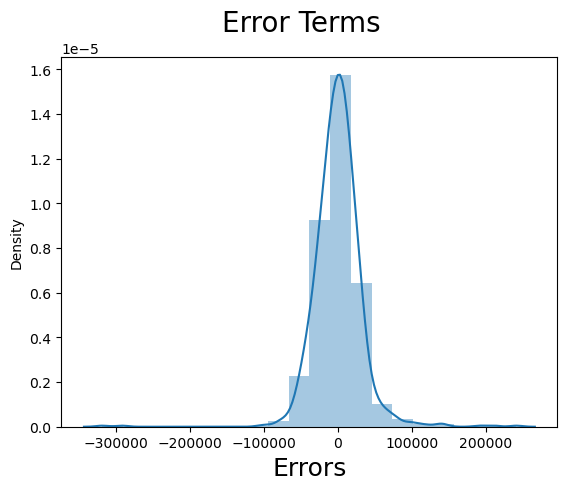

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [103]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.83

In [104]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1113839565504.7102
1090930034.7744462
33029.23000577589


In [105]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

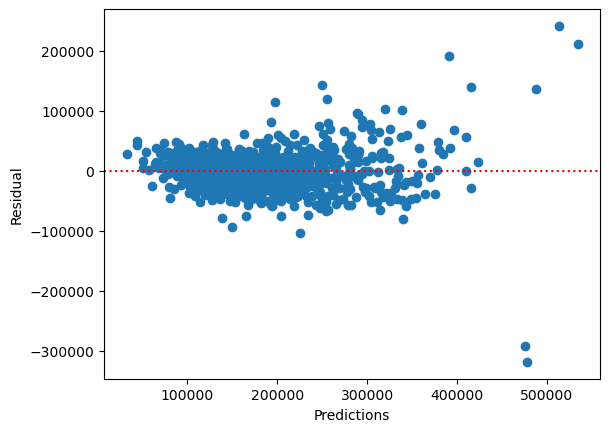

In [106]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [107]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [108]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,-0.032377,-0.068902,0.025916,-0.033111,-0.019212,-0.050044,0.026373,-0.010664,-0.016811,-0.091341,-0.030499,-0.012195,0.038505,0.042261,-0.105435,0.001920,0.027773,0.075129,0.049396,0.003095,-0.020822,0.015445,0.042849,-0.018849,-0.067836,-0.054609,0.066047,0.058699,-0.030043,0.039931,181645.895216,0.005526
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,0.935148,0.798998,0.949447,0.844311,0.949066,0.902588,1.009237,1.029982,0.961083,0.956973,0.966692,0.995798,1.014870,0.983782,0.846603,1.024904,1.042020,0.993950,0.973170,0.990890,1.006806,1.026307,1.023814,1.004550,0.887293,0.638820,1.280055,1.477231,0.348993,0.945506,80320.777267,0.991060
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,-0.964030,-0.293313,-1.256903,-2.314361,-2.208049,-2.098584,-0.789230,-0.124502,-2.227567,-0.837450,-0.247791,-2.840982,-0.753316,-3.484694,-4.580922,-2.293993,-2.806960,-0.927153,-0.985354,-4.106758,-2.375841,-2.225247,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.925187,37900.000000,-1.203301
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.688366,-0.542629,-1.181447,-0.680437,-0.789230,-0.124502,-0.747101,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.198233,-1.034916,-0.641156,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,132000.000000,-0.972515
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,-0.187498,-0.293313,-0.142124,-0.172157,-0.154845,-0.202692,-0.789230,-0.124502,-0.116915,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.238898,0.306009,-0.009406,-0.744598,-0.348159,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.105172,165000.000000,-0.049373
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,0.555693,-0.293313,0.546809,0.405345,0.871757,0.434720,0.914249,-0.124502,0.520795,1.066863,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,0.622148,1.206469,0.291653,0.306009,0.490337,0.702136,0.279079,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,213075.000000,0.577044
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,3.742487,6.306447,3.057292,3.186070,0.871757,3.408051,2.861246,11.746585,3.931322,2.971177,8.047130,2.597723,3.242196,3.836032,8.459379,2.259799,3.424626,2.171449,1.754425,0.309238,1.646935,3.658517,5.106640,7.556556,4.668571,7.459033,9.126179,21.324526,4.240389,2.078846,611657.000000,3.247562


In [109]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [110]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Shng', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [111]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [112]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new.astype(float)).fit()

In [113]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     97.29
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          2.72e-151
Time:                        20:48:09   Log-Likelihood:                -5173.2
No. Observations:                 439   AIC:                         1.039e+04
Df Residuals:                     415   BIC:                         1.049e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.772e+05   5208.397     34.025      0.000    1.67e+05    1.87e+05
OverallQual           2.841e+04   2707.107     10.495      0.000    2.31e+04    3.37e+04
BsmtExposure          9230.6715   1912.518      4.826      0.000    5471.241     1.3e+04
1stFlrSF              2.864e+04   2531.855     11.313      0.000    2.37e+04    3.36e+04
2ndFlrSF              2.902e+04   3052.863      9.505      0.000     2.3e+04     3.5e+04
MSSubClass_90        -1.816e+04   1.09e+04     -1.670      0.096   -3.95e+04    3218.855
MSSubClass_120       -2.535e+04   7862.022     -3.224      0.001   -4.08e+04   -9891.286
MSSubClass_160       -2.687e+04   8639.088     -3.110      0.002   -4.38e+04   -9886.306
MSSubClass_190        2750.8581   1.56e+04      0.177      0.860   -2.78e+04    3.33e+04
LotShape_IR3         -5790.4083   3.31e+04     -0.175      0.861   -7.08e+04    5.92e+04
LotConfig_CulDSac     1.419e+04   6550.923      2.166      0.031    1309.015    2.71e+04
Neighborhood_NoRidge  4.162e+04   1.45e+04      2.863      0.004     1.3e+04    7.02e+04
Neighborhood_NridgHt  7.841e+04   8890.096      8.820      0.000    6.09e+04    9.59e+04
Neighborhood_Somerst  1.597e+04   7314.739      2.183      0.030    1588.361    3.03e+04
Neighborhood_StoneBr  8.441e+04   1.06e+04      7.982      0.000    6.36e+04    1.05e+05
HouseStyle_1Story     1.608e+04   6189.692      2.599      0.010    3917.415    2.83e+04
HouseStyle_2.5Unf    -5.516e+04   2.05e+04     -2.697      0.007   -9.54e+04   -1.49e+04
Exterior1st_Stucco    2370.0511   1.49e+04      0.159      0.873   -2.68e+04    3.16e+04
Exterior2nd_BrkFace  -6715.0610   1.11e+04     -0.603      0.547   -2.86e+04    1.52e+04
Exterior2nd_ImStucc    2.86e+04   2.45e+04      1.166      0.244   -1.96e+04    7.68e+04
Exterior2nd_Wd Shng   2.842e+04    1.4e+04      2.023      0.044     810.172     5.6e+04
GarageFinish_NA      -2.627e+04   8696.137     -3.021      0.003   -4.34e+04   -9177.459
GarageFinish_RFn     -7219.7299   4535.224     -1.592      0.112   -1.61e+04    1695.145
GarageFinish_Unf     -1.035e+04   4966.963     -2.084      0.038   -2.01e+04    -589.884
==============================================================================
Omnibus:                       73.323   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.427
Skew:                           0.430   Prob(JB):                    8.24e-125
Kurtosis:                       8.523   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [115]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.81

In [116]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

531824077676.25446
1211444368.2830396
34805.80940422216


In [117]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [118]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,HouseStyle_1Story,3.90
0,OverallQual,2.74
3,2ndFlrSF,2.57
22,GarageFinish_Unf,2.25
2,1stFlrSF,2.06
21,GarageFinish_RFn,1.58
11,Neighborhood_NridgHt,1.43
5,MSSubClass_120,1.36
12,Neighborhood_Somerst,1.34
6,MSSubClass_160,1.33


Text(0, 0.5, 'y_pred')

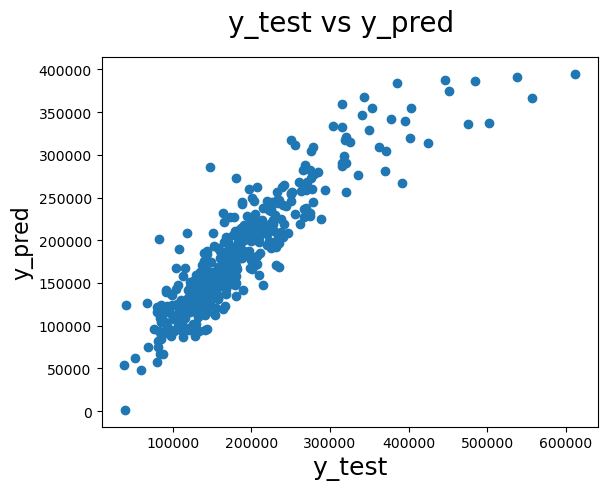

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [120]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Shng', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')

In [121]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,6,284,1262,1262,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,7,434,920,920,866,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7,540,756,961,756,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,8,490,1145,1145,1053,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


### Final evalution
- No of Variables = `21` i.e. `OverallQual`,`BsmtUnfSF`, `TotalBsmtSF`,`1stFlrSF`, `2ndFlrSF`, `MSSubClass_90`, `MSSubClass_160`, `MSZoning_RL`, `LotShape_IR3`, `LotConfig_CulDSac`, `Neighborhood_Crawfor` , `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Neighborhood_Veenker`, `Exterior1st_ImStucc`, `Exterior1st_Stucco`, `Exterior2nd_CmentBd` , `Exterior2nd_ImStucc`, `Exterior2nd_VinylSd`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.80`
- r2 score for Test Data set model = `0.82`

In [122]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8254677827773059
0.8117919998261852
1113839565504.7102
531824077676.25446
1090930034.7744462
1211444368.2830396


### Ridge Regression

In [123]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [125]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 29116.80938968  13091.6080918   24125.06025813  27957.10369218
 -17533.53056157 -16647.20134286 -16692.3985744  -12852.33620674
 -14640.52829759  13919.83281146  41675.72264037  45376.64124979
  21576.39076405  13911.36950248  22813.04018141 -12627.9254586
 -14747.9255844   11605.36982617   9416.14974127 -11920.4211141
 -19166.90693605 -11316.17061485 -16585.55145704]


In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8206102859572507
0.8042906229232218
1144839413175.1677
553020906977.0073
1121292275.391937
1259728717.4874883


### Lasso

In [127]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [129]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [130]:
lasso.coef_

array([ 27487.67942543,  13317.9266105 ,  23592.0032284 ,  28329.03905106,
       -19239.17559988, -19713.28240417, -19853.29044086, -13671.22536789,
       -18031.29262843,  14267.19738293,  53980.60064332,  56013.3903425 ,
        26875.799173  ,  22155.69779359,  24044.63317963, -13789.79012954,
       -15462.90798363,  14002.63670482,   7860.62732776, -12433.40365862,
       -21626.70118116, -12267.47278731, -17015.33397504])

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8238735740290704
0.8082784818973217
1124013576972.133
541752313618.3565
1100894786.4565456
1234059939.9051402


In [132]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.254678e-01,8.206103e-01,8.238736e-01
1,R2 Score (Test),8.117920e-01,8.042906e-01,8.082785e-01
2,RSS (Train),1.113840e+12,1.144839e+12,1.124014e+12
3,RSS (Test),5.318241e+11,5.530209e+11,5.417523e+11
4,MSE (Train),3.302923e+04,3.348570e+04,3.317973e+04
5,MSE (Test),3.480581e+04,3.549266e+04,3.512919e+04


## Lets observe the changes in the coefficients after regularization

In [133]:
betas = pd.DataFrame(index=X.columns)

In [134]:
betas.rows = X.columns

In [135]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [136]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,26398.766751,29116.809390,27487.679425
BsmtExposure,13475.345319,13091.608092,13317.926610
1stFlrSF,23356.909701,24125.060258,23592.003228
2ndFlrSF,29220.799597,27957.103692,28329.039051
MSSubClass_90,-22747.603676,-17533.530562,-19239.175600
MSSubClass_120,-23925.817405,-16647.201343,-19713.282404
MSSubClass_160,-24257.504488,-16692.398574,-19853.290441
MSSubClass_190,-17856.848863,-12852.336207,-13671.225368
LotShape_IR3,-30043.299097,-14640.528298,-18031.292628
LotConfig_CulDSac,15488.305480,13919.832811,14267.197383


### Que1: Double the values of Alpha for lasso & Ridge

In [137]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 30530.98268811  12811.71725991  24598.53151661  26895.57451593
 -14558.78981527 -12975.33138736 -13081.72464802 -10130.39857177
  -9706.25209115  12482.18637222  33390.00310884  36713.93880134
  16828.22364959   7995.04273497  20461.20591152  -8568.54719971
 -11705.62008782   7709.07677245   5983.46062183  -9885.46692752
 -16023.1187539   -9440.09109383 -15471.77560027]
0.8143943673885593
0.7992671262303854


___Coeff values are increasing as alpha will increase.r2_score of train data is also drop from .83 to 0.81___

In [138]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 28571.92105094  13111.72606802  23810.091012    27442.69976132
 -15829.59268473 -15592.48234854 -15620.43484848  -9444.39328829
  -5969.84867207  13141.55212043  51540.87335208  51160.09395947
  23014.72657059  10423.00170746  22849.06672609  -1747.97787579
 -11340.30936126   5539.89452434      0.         -10080.00185223
 -19325.98714747 -10474.31856785 -16095.68432887]
0.8194751722908323
0.801758629229271


___As alpha value increased more features removed from model. But r2score is also dropped by 1% in both test and train data___

### Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `2ndFlrSF`, `OverallQual`, `Neighborhood_Somerst`___

In [139]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Somerst'], axis=1)

In [140]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Somerst'], axis=1)

In [141]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [143]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [144]:
lasso.coef_

array([ 10305.46237487,  43323.95768374, -30200.23237953,     -0.        ,
            0.        , -15154.29452717,     -0.        ,   9325.7136197 ,
            0.        , -38848.08879805,      0.        ,     -0.        ,
           -0.        ,      0.        ,     -0.        , -59431.8710709 ,
       -13930.95050733, -50949.54989914])

In [145]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.5895904973178379
0.5967850659020477


___After dropping the top 5 features model r2 score is very low i.e. 58% for Train and 59% for Test.___

In [146]:
X_train_new.columns

Index(['BsmtExposure', '1stFlrSF', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Shng', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object')